# Reference 

In this jupyter notebook we get reference for the distribution with light tails such that 
\begin{equation*}
\mu^* \propto \exp \big(-\tfrac{|x|^4}{4} \big) \
\end{equation*}
with the standard Metropolis-Hastings algortihm.

Load necessary libraries:

In [ ]:
import numpy as np
from tqdm import tqdm
import scipy.stats as sp
import matplotlib.pyplot as plt
import jupyprint as jp

We define the parameters of the run:

In [ ]:
# PARAMETERS OF THE RUN
initial_sample = 0*np.ones(1000)
d = len(initial_sample)
time_step = 1e-2
sampling = 10**7
n_MC = 100
tune_interval = 10000
number_of_samples = sampling+tune_interval

We define potential function:

In [ ]:
# define a potential and its gradient
def potential(x:float) -> float:
    return np.linalg.norm(x)**4/4

def density_c(x:float) -> float:
    return np.exp(-potential(x))

Run the Metropolis-Hastings algorithm and then estimate moments $\mathbb{E} |X|^2$, $\mathbb{E} |X|^4$, $\mathbb{E} |X|^6$.

In [ ]:
#Metropolis algorithm

accept_count = 0

number_of_samples_metropolis = 10**5 + tune_interval

samples_metropolis = [np.zeros(d)]
samples_metropolis_norms = [np.linalg.norm(samples_metropolis[-1])]

for _ in tqdm(range(1, number_of_samples_metropolis)):

    # get proposal
    proposal = samples_metropolis[-1] + sp.norm.rvs(
        loc=0, 
        scale=0.014, 
        size=d
        )
    
    if density_c(samples_metropolis[-1]) == 0:
        alpha = 1
    else:
        alpha = density_c(proposal)/density_c(samples_metropolis[-1])

    u = sp.uniform.rvs()

    if u <= alpha:
        samples_metropolis.append(proposal)
        accept_count += 1
    else:
        samples_metropolis.append(samples_metropolis[-1])

    samples_metropolis_norms.append(np.linalg.norm(samples_metropolis[-1]))
    


jp.jupyprint("$ \\text{acceptance rate   } \\alpha = " + str(np.round(accept_count/number_of_samples_metropolis, 3))+ "$")

samples_metropolis = np.array(samples_metropolis[tune_interval:])
samples_metropolis_norms = np.array(samples_metropolis_norms[tune_interval:])
    
jp.jupyprint("$ \mathbb{E} |X|^2 = " + str(np.mean(samples_metropolis_norms**2)) + "$")
jp.jupyprint("$ \mathbb{E} |X|^4 = " + str(np.mean(samples_metropolis_norms**4)) + "$")
jp.jupyprint("$ \mathbb{E} |X|^6 = " + str(np.mean(samples_metropolis_norms**6)) + "$")

100%|██████████| 109999/109999 [00:28<00:00, 3884.00it/s]


$ \text{acceptance rate   } \alpha = 0.214$

$ \mathbb{E} |X|^2 = 31.62063663145503$

$ \mathbb{E} |X|^4 = 1000.7186255724904$

$ \mathbb{E} |X|^6 = 31697.446927841163$

Plot the trace of a selected coordinate at selected interval

$\text{Note: First }10000\text{ samples were burned.}$

Text(18.801307704614644, 0.5, '$x_{1}$')

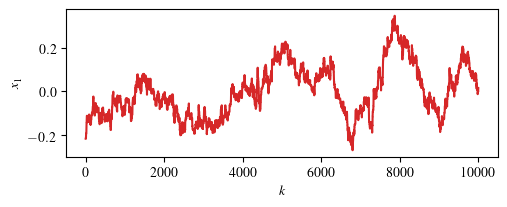

In [ ]:
coord_draw = 1

#plt.style.use(['science'])
plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "text.usetex": True,
    } 
    )


# plot trajectory of some coordinate 
sel1 = 0
sel2 = 10000

jp.jupyprint("$\\text{Note: First }" + str(tune_interval) + "\\text{ samples were burned.}$")

plt.figure(figsize=(5,2))
plt.plot(np.arange(sel1, sel2), samples_metropolis[sel1:sel2, coord_draw], color="C3")
plt.tight_layout()
plt.xlabel("$k$")
plt.ylabel("$x_{"+str(coord_draw)+"}$")
